In [113]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import gzip
import tensorflow as tf
import glob
import math
import skimage
from matplotlib.patches import Rectangle

In [2]:
tf.enable_eager_execution()

## Specify the Experiment Directory

In [3]:
common_dir = '/home/justinvyu/ray_results'
universe = 'gym'
domain = 'Point2D'
task = 'Maze-v0'

In [149]:
base_path = os.path.join(common_dir, universe, domain, task)
exps = sorted(list(glob.iglob(os.path.join(base_path, '*'))))
for i, exp in enumerate(exps):
    print(f'{i} \t {exp.replace(base_path, "")}')
    
exp_choice = int(input('\n Which experiment do you want to analyze? (ENTER A NUMBER) \t'))

exp_path = exps[exp_choice]
print('\n')
seeds = sorted(list(glob.iglob(os.path.join(exp_path, '*'))))
seeds = [seed for seed in seeds if os.path.isdir(seed)]
for i, seed in enumerate(seeds):
    print(f'{i} \t {seed.replace(exp_path, "")}')
    
# TODO: Extend to analyzing all seeds
seed_choice = int(input('\n Which seed do you want to analyze? (ENTER A NUMBER) \t'))

seed_path = seeds[seed_choice]

print('PATH:\n', seed_path)

0 	 /2020-03-20T01-13-01-vice_easymaze_singlreset_mixup
1 	 /2020-03-20T01-15-53-vice_mediummaze_singlreset_mixup
2 	 /2020-03-20T01-26-41-vice_hardmaze_singlreset_mixup
3 	 /2020-03-20T01-28-50-sqil_easymaze
4 	 /2020-03-20T01-35-22-vice_mediummaze_singlreset_mixup_100pathlength

 Which experiment do you want to analyze? (ENTER A NUMBER) 	4


0 	 /bd5bbba4-algorithm=VICE-seed=844_2020-03-20_01-35-22gccsfn_u
1 	 /bd5c5118-algorithm=VICE-seed=6348_2020-03-20_01-35-23feghiylv
2 	 /bd5cedc6-algorithm=VICE-seed=5547_2020-03-20_01-35-23a1uuti9s
3 	 /bd5d56bc-algorithm=VICE-seed=898_2020-03-20_01-35-233ka019r7

 Which seed do you want to analyze? (ENTER A NUMBER) 	1
PATH:
 /home/justinvyu/ray_results/gym/Point2D/Maze-v0/2020-03-20T01-35-22-vice_mediummaze_singlreset_mixup_100pathlength/bd5c5118-algorithm=VICE-seed=6348_2020-03-20_01-35-23feghiylv


## Specify the Checkpoint

In [97]:
checkpoint_to_analyze = 100

In [98]:
with open(os.path.join(seed_path, f'checkpoint_{checkpoint_to_analyze}/checkpoint.pkl'), 'rb') as f:
    checkpoint = pickle.load(f)

W0323 13:28:59.330726 140053697865536 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


## Load Reward Classifier

In [99]:
reward_clf = checkpoint['reward_classifier']

In [100]:
train_env = checkpoint['training_environment']

In [101]:
target_pos = train_env.unwrapped._get_obs()['state_desired_goal']

In [102]:
n_samples = 50
obs_space = train_env.observation_space['state_observation']
xs = np.linspace(obs_space.low[0], obs_space.high[0], n_samples)
ys = np.linspace(obs_space.low[1], obs_space.high[1], n_samples)

xys = np.meshgrid(xs, ys)

In [103]:
grid_vals = np.array(xys).transpose(1, 2, 0).reshape((n_samples * n_samples, 2))

In [104]:
rewards = reward_clf.predict(grid_vals)

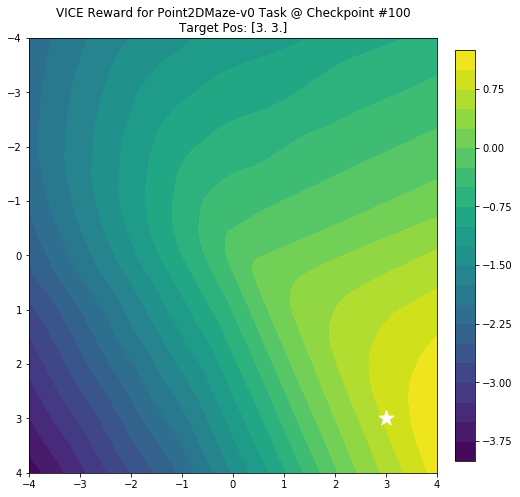

In [105]:
plt.figure(figsize=(8, 8))
from matplotlib.patches import Rectangle
plt.gca().invert_yaxis()

plt.contourf(xys[0], xys[1], rewards.reshape(xys[0].shape), levels=20)
plt.colorbar(fraction=0.046, pad=0.04)

if task == 'BoxWall-v1':
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                          alpha=1, fill=None, linewidth=4))

plt.scatter(*target_pos, marker='*', s=250, color='white')
plt.title(f'VICE Reward for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}\n'
          + f'Target Pos: {target_pos}')
plt.show()

In [137]:
def plot_vice_reward(clf, train_env, n_samples=50):
    obs_space = train_env.observation_space['state_observation']
    xs = np.linspace(obs_space.low[0], obs_space.high[0], n_samples)
    ys = np.linspace(obs_space.low[1], obs_space.high[1], n_samples)

    xys = np.meshgrid(xs, ys)
    grid_vals = np.array(xys).transpose(1, 2, 0).reshape((n_samples * n_samples, 2))
    
    rewards = clf.predict(grid_vals)
    plt.gca().invert_yaxis()
    plt.contourf(xys[0], xys[1], rewards.reshape(xys[0].shape), levels=20)
    plt.colorbar(fraction=0.046, pad=0.04)
    target_pos = train_env.unwrapped._get_obs()['state_desired_goal']

    if task == 'BoxWall-v1':
        currentAxis = plt.gca()
        currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                              alpha=1, fill=None, linewidth=4))

    plt.scatter(*target_pos, marker='*', s=250, color='white')

In [115]:
def plot_grid(imgs, labels=None):
    n_images = len(imgs)
    n_columns = np.sqrt(n_images)
    n_rows = np.ceil(n_images / n_columns) + 1
    plt.figure(figsize=(5 * n_columns, 5 * n_rows))
    for i, img in enumerate(imgs):
        plt.subplot(n_rows, n_columns, i+1)
        plt.axis('off')
        plt.imshow(img)
        if labels is not None:
            plt.title(labels[i], fontsize=20)
    plt.show()

In [150]:
checkpoint_paths = list(glob.iglob(os.path.join(seed_path, 'checkpoint_*')))
# Sort by the checkpoint number at the end
checkpoint_paths = sorted(checkpoint_paths, key=lambda s: int(s.split("_")[-1]))

W0323 13:57:23.980784 140053697865536 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0323 13:57:24.221135 140053697865536 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0323 13:57:24.426929 140053697865536 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0323 13:57:24.606836 140053697865536 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0323 13:57:24.784926 140053697865536 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0323 13:57:24.968853 140053697865536 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0323 13:57:25.152737 140053697865536 hdf5_format.py:171] No training 

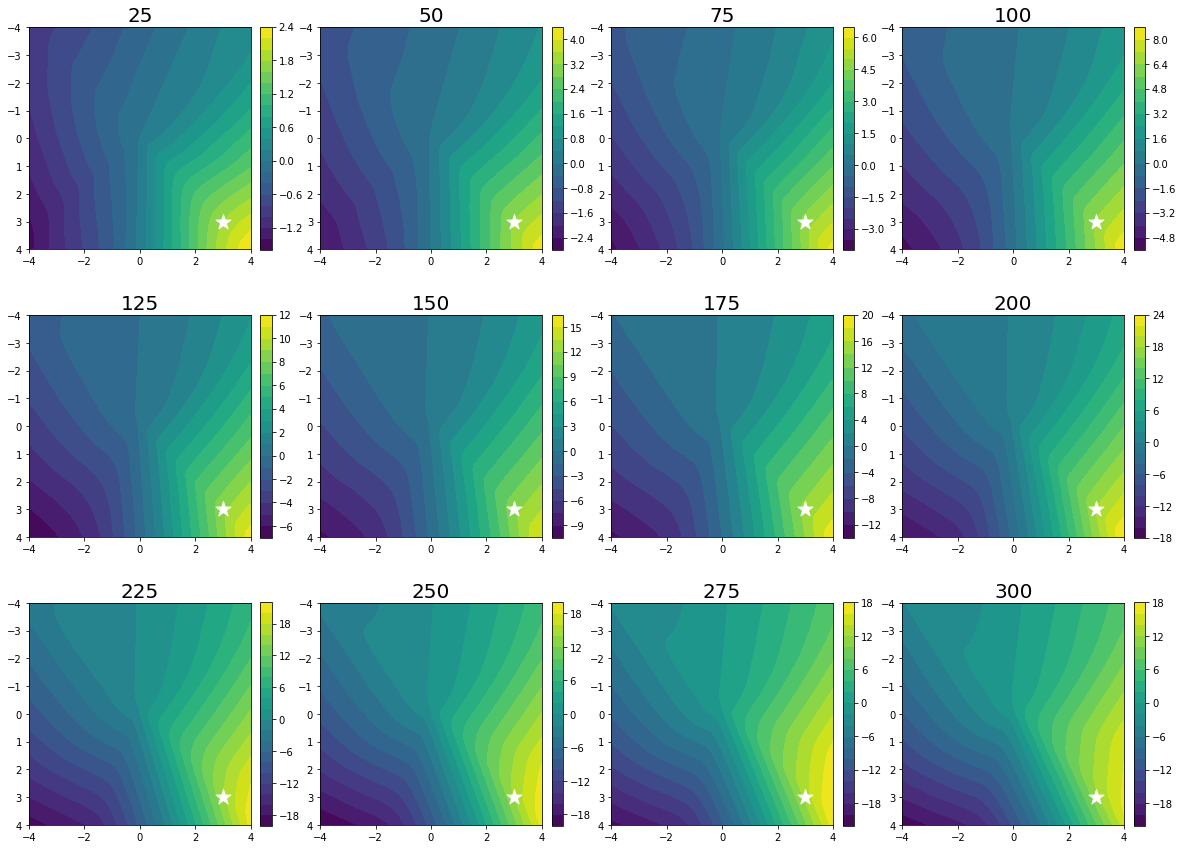

In [151]:
n_plots = len(checkpoint_paths)
n_columns = int(np.sqrt(n_plots) + 1)
n_rows = np.ceil(n_plots / n_columns)
plt.figure(figsize=(5 * n_columns, 5 * n_rows))

for i, path in enumerate(checkpoint_paths):
    with open(os.path.join(path, 'checkpoint.pkl'), 'rb') as f:
        checkpoint = pickle.load(f)
    reward_clf = checkpoint['reward_classifier']
    train_env = checkpoint['training_environment']
    plt.subplot(n_rows, n_columns, i+1, aspect=1)
    plot_vice_reward(reward_clf, train_env)
    plt.title(int(path.split("_")[-1]), fontsize=20)
    
plt.show()

## Plot Goal Examples

In [379]:
with open('/home/justinvyu/dev/vice/goal_classifier/pointmass_nowalls/bottom_middle/positives.pkl', 'rb') as f:
    data = pickle.load(f)

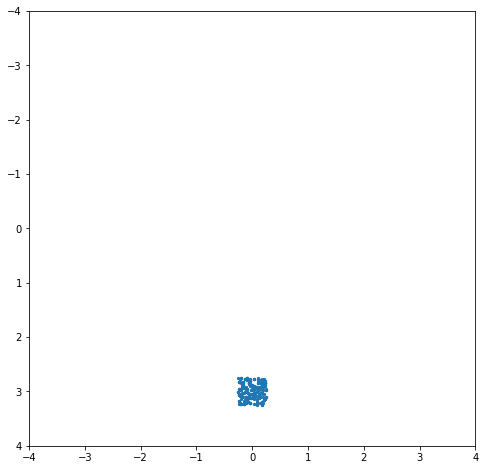

In [380]:
plt.figure(figsize=(8, 8))

plt.scatter(data['state_observation'][:,0], data['state_observation'][:,1], s=5)
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.gca().invert_yaxis()

## Plot Ground Truth Rewards

In [ ]:
feed_dict = {
    'state_achieved_goal': grid_vals,
    'state_desired_goal': np.full(grid_vals.shape, fill_value=2)
}
train_env.unwrapped.reward_type = 'sparse'
gtr = train_env.unwrapped.compute_rewards(None, feed_dict)
plt.figure(figsize=(8, 8))

from matplotlib.patches import Rectangle

plt.gca().invert_yaxis()

plt.contourf(xys[0], xys[1], gtr.reshape(xys[0].shape))
plt.colorbar(fraction=0.046, pad=0.04)

if task == 'BoxWall-v1':
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                          alpha=1, fill=None, linewidth=4))

plt.title(f'Ground Truth Reward for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}')

plt.scatter(*target_pos, marker='*', s=250, color='white')
plt.show()

## Qs Visualization

In [92]:
checkpoint_to_analyze = 100
checkpoint_dir = os.path.join(seed_path, f'checkpoint_{checkpoint_to_analyze}')

with open(os.path.join(checkpoint_dir, 'checkpoint.pkl'), 'rb') as f:
    checkpoint = pickle.load(f)

W0319 17:30:58.769956 139785765324608 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [93]:
variant = checkpoint['variant']
env = checkpoint['training_environment']
target_pos = env.unwrapped._get_obs()['state_desired_goal']

In [94]:
from softlearning.value_functions.utils import get_Q_function_from_variant

In [95]:
Qs = get_Q_function_from_variant(variant, env)

In [96]:
for i, Q in enumerate(Qs):
    weights_path = os.path.join(checkpoint_dir, f'Qs_{i}')
    Q.load_weights(weights_path)

In [97]:
n_action_samples = 20
sample_actions = np.vstack([env.action_space.sample() for _ in range(n_action_samples)])

In [98]:
n_samples = 50

obs_space = env.observation_space['state_observation']
xs = np.linspace(obs_space.low[0], obs_space.high[0], n_samples)
ys = np.linspace(obs_space.low[1], obs_space.high[1], n_samples)

xys = np.meshgrid(xs, ys)
grid_vals = np.array(xys).transpose(1, 2, 0).reshape((n_samples * n_samples, 2))

In [99]:
value_estimates = []
for pos in grid_vals:
    value_estimates.append(
        np.min([Q.predict([sample_actions,
                        np.repeat(pos, n_action_samples).reshape((n_action_samples, -1))])
             for Q in Qs])
    )

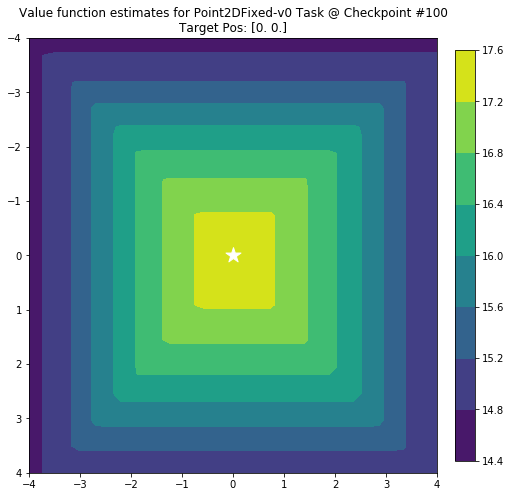

In [100]:
plt.figure(figsize=(8, 8))
from matplotlib.patches import Rectangle
plt.gca().invert_yaxis()

plt.contourf(xys[0], xys[1], np.array(value_estimates).reshape(xys[0].shape))
plt.colorbar(fraction=0.046, pad=0.04)

if task == 'BoxWall-v1':
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                          alpha=1, fill=None, linewidth=4))

plt.scatter(*target_pos, marker='*', s=250, color='white')
plt.title(f'Value function estimates for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}\n'
          + f'Target Pos: {target_pos}')
plt.show()

In [46]:
Qs[0].summary()

Model: "picklable_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
actions (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
observations/state_observation  [(None, 2)]          0                                            
__________________________________________________________________________________________________
feedforward_Q (PicklableSequent (None, 1)            17281       actions[0][0]                    
                                                                 observations/state_observation[0]
Total params: 17,281
Trainable params: 17,281
Non-trainable params: 0
__________________________________________________________________________________________________


In [51]:
np.repeat(grid_vals[0], n_action_samples).reshape((n_action_samples, -1))

array([[-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.]])